In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter, MaxNLocator, ScalarFormatter
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
import joypy
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import joypy
import statsmodels.api as sm

C:\Users\aa271\AppData\Local\Temp\ipykernel_3232\1648478361.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [2]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")
datajhsoa=pd.read_csv("groupedjhSOA.csv")
datacmsoa=pd.read_csv("groupedcmSOA.csv")

In [3]:
datajhsoa["SOA"]=0
datajh["SOA"]=0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("0.25um")):(datajhsoa.columns.get_loc("0.28um"))]:
    datajhsoa["SOA"]=datajhsoa["SOA"]+datajhsoa[i]
    datajh["SOA"]=datajh["SOA"]+datajh[i]
datajhsoa["CSOA"]=0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("C0.25um")):(datajhsoa.columns.get_loc("C0.28um"))]:
    datajhsoa["CSOA"]=datajhsoa["CSOA"]+datajhsoa[i]
datacmsoa["SOA"]=0
datacm["SOA"]=0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("0.25um")):(datacmsoa.columns.get_loc("0.28um"))]:
    datacmsoa["SOA"]=datacmsoa["SOA"]+datacmsoa[i]
    datacm["SOA"]=datacm["SOA"]+datacm[i]
datacmsoa["CSOA"]=0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("C0.25um")):(datacmsoa.columns.get_loc("C0.28um"))]:
    datacmsoa["CSOA"]=datacmsoa["CSOA"]+datacmsoa[i]

In [4]:
variables_to_plot = ['PM1', '异戊二烯浓度','1,3-丁二烯浓度','丁烯浓度', '戊烯浓度','NOx','O3','SO2','地面层净辐射', '地面层温度', '地面层湿度']
realnamesunit = ['PM$_1$ ($μg/m^3$)','Isoprene\n($μg/m^3$)', '1,3-Butadiene\n($μg/m^3$)', 'Butene\n($μg/m^3$)', 'Pentene\n($μg/m^3$)', 'NO$_x$ (ppb)', 'O$_3$ (ppm)', 'SO$_2$ (ppb)', 'Radiation (W/m$^2$)', 'Temperature\n(℃)', 'Humidity (%)']
realnames = ['PM$_1$', 'Isoprene', '1,3-Butadiene', 'Butene', 'Pentene', 'NO$_x$', 'O$_3$', 'SO$_2$', 'GNR', 'Temperature', 'Humidity']

C:\Users\aa271\AppData\Local\Temp\ipykernel_3232\3824623472.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location=location.groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aa271\AppData\Local\Temp\ipykernel_3232\3824623472.py:88: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location[variable + '_std']=

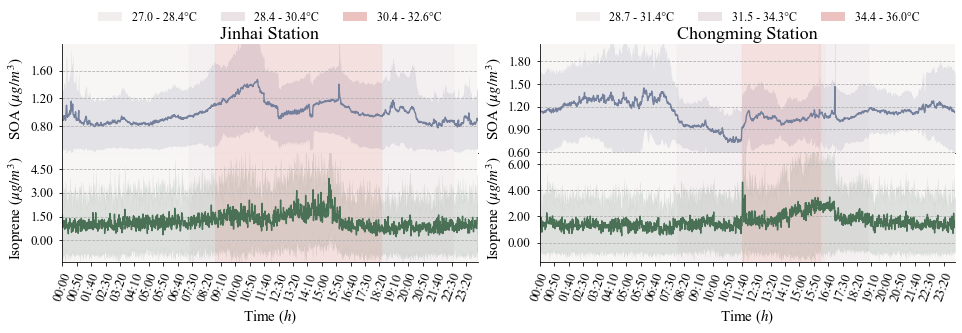

In [5]:
from sklearn.cluster import KMeans
from matplotlib.patches import Patch

def clusterplot(data, fig, ax):
    clusterN = 3
    from sklearn.preprocessing import MinMaxScaler

    t = data.index
    color = cluster_colors

    for i in range(clusterN):
        cluster_data = data.cluster.copy()
        cluster_data.columns = "label"
        if i != 0:
            cluster_data[cluster_data != i] = 0
            cluster_data[cluster_data == i] = 1
        if i == 0:
            cluster_data[cluster_data != 0] = -2
            cluster_data[cluster_data == 0] = 1
            cluster_data[cluster_data != 1] = 0

        y = cluster_data.values
        splits = np.where(y[1:] != y[:-1])[0] + 1
        splits = np.concatenate(([0], splits, [len(y) - 1]))

        for k in range(len(splits) - 1):
            if y[splits[k]]:
                ax.axvspan(t[splits[k]], t[splits[k + 1]], alpha=0.5, color=color[i])
    ax.set_xlim(-10, np.max(list(data.reset_index().index)) + 120)
    plt.tight_layout()


# 更新的变量、颜色、线型和真实名称列表
variables_to_plot1 = ['SOA', '异戊二烯浓度']
realnamesunit1 = ['SOA ($μg/m^3$)','Isoprene ($μg/m^3$)']
realnames1 = ['SOA', 'Isoprene']


cpal = ["#75809C","#4A7056"]
cluster_colors = ['#F2EEED', '#EBE2E5', '#EBC2C0']


placedata = [datajh, datacm]
name=["jh","cm"]


fig = plt.figure(figsize=(16, 4))

# 创建一个 GridSpec 布局，根据variables_to_plot的长度
gs = fig.add_gridspec(len(variables_to_plot1), 2, hspace=0, wspace=0.15)

for p, location in enumerate(placedata):
    placedata=location.copy()
    location=location.groupby(["Hour_Min"]).mean().reset_index()

    # 使用KMeans算法进行聚类，聚类数量为3
    kmeans = KMeans(n_clusters=3, random_state=132,max_iter=3000).fit(location[['地面层温度']])

    # 获得每个聚类中心的温度
    centroids = kmeans.cluster_centers_.flatten()

    # 根据聚类中心温度对标签进行排序
    sorted_labels = [label for _, label in sorted(zip(centroids, range(3)))]

    # 将排序后的标签映射到原始标签
    remapped_labels = {original: sorted_labels.index(original) for original in range(3)}

    # 更新DataFrame中的标签
    location['cluster'] = [remapped_labels[label] for label in kmeans.labels_]

    # 将聚类结果标记为lower, medium, higher temperature
    temperature_labels = ['lower temperature', 'medium temperature', 'higher temperature']
    location['Tcluster'] = location['cluster'].apply(lambda x: temperature_labels[x])



    if name[p] == "jh":
        locationname = "Jinhai"
    else:
        locationname = "Chongming"


    for var_idx, variable in enumerate(variables_to_plot1):
        # 对于每个变量，选择一个子图
        ax = fig.add_subplot(gs[var_idx, p])
        ax.grid(linestyle="--",axis='y')

        location[variable + '_std']=placedata.groupby(["Hour_Min"]).std().reset_index()[variable]

          # 计算均值和标准偏差
        mean_values = placedata.groupby("Hour_Min")[variable].mean()
        std_values = placedata.groupby("Hour_Min")[variable].std()

        sns.lineplot(x=location.Hour_Min, y=location[variable],
                 ax=ax, color=cpal[var_idx], err_style='band', errorbar='sd')
        ax.fill_between(location.Hour_Min, mean_values - std_values, mean_values + std_values, color=cpal[var_idx], alpha=0.3)


                # 使用 clusterplot 函数绘制背景色
        clusterplot(location,fig, ax)



        # 设置标题和图例
        ax.set_ylabel(realnamesunit1[var_idx], fontsize=15)  # 使用realnames作为y轴标签


        # 设置x-ticks为combined_temp_data的索引
        if var_idx == len(variables_to_plot1) - 1:  # 只在最后一个小子图中显示x轴标签
            interval = 50  # 每隔400个点显示一个时间
            ticks = location.Hour_Min[::interval]
            labels = location.Hour_Min[::interval]
            ax.set_xticks(ticks)
            ax.set_xticklabels(labels, rotation=70)  # rotation可以使标签旋转，提高可读性
            ax.set_xlabel("Time ($h$)",fontsize=15)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlim(0, location.shape[0])
        ax.set_ylim(mean_values.mean()-1.3*std_values.mean(), mean_values.mean()+2.2*std_values.mean())

        if var_idx == 0:
            ax.set_title(f"{locationname} Station", fontsize=18)

        # 移除每个子图的上和右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        #设置刻度
        ax.tick_params(axis='both', labelsize=13)

        def format_ticks(x, pos):
            return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
        # 设置x轴刻度的格式
        ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))


        if var_idx == 0:
            temperature_ranges = {}
            for cluster_label in range(3):  # 对于每个聚类标签
                cluster_temps = location[location['cluster'] == cluster_label]['地面层温度']
                temperature_ranges[temperature_labels[cluster_label]] = (cluster_temps.min(), cluster_temps.max())


             # 为当前地点添加图例
            legend_elements = [Patch(facecolor=cluster_colors[i], edgecolor='none',
                                     label=f'{temp_range[0]:.1f} - {temp_range[1]:.1f}°C')
                               for i, temp_range in enumerate(temperature_ranges.values())]


            # 这里假设你希望图例出现在每个地点的最后一个子图上
            ax.legend(handles=legend_elements, title='', frameon=False, loc="upper center", fontsize=12, ncol=3, bbox_to_anchor=(0.5, 1.4))


plt.tight_layout()
plt.savefig("BVOCsSOA plot.svg", bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_27212\3662673838.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location=location.groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aa271\AppData\Local\Temp\ipykernel_27212\3662673838.py:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location[variable + '_std'

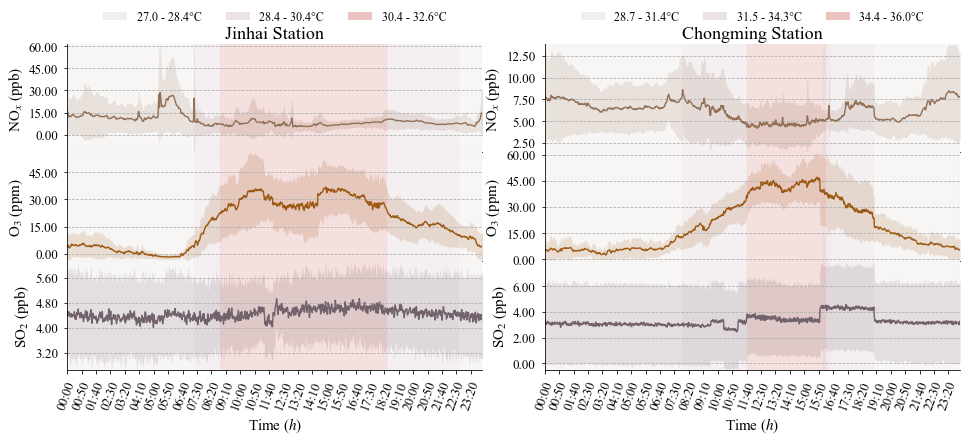

In [79]:
# 更新的变量、颜色、线型和真实名称列表
variables_to_plot1 = ['NOx','O3','SO2']
realnamesunit1 = ['NO$_x$ (ppb)', 'O$_3$ (ppm)', 'SO$_2$ (ppb)']
realnames1 = ['NOx','O3','SO2']


cpal = ["#927157","#9D5A16","#72626C"]
cluster_colors = ['#F2EEED', '#EBE2E5', '#EBC2C0']


placedata = [datajh, datacm]
name=["jh","cm"]


fig = plt.figure(figsize=(16, 6))

# 创建一个 GridSpec 布局，根据variables_to_plot的长度
gs = fig.add_gridspec(len(variables_to_plot1), 2, hspace=0, wspace=0.15)

for p, location in enumerate(placedata):
    placedata=location.copy()
    location=location.groupby(["Hour_Min"]).mean().reset_index()

    # 使用KMeans算法进行聚类，聚类数量为3
    kmeans = KMeans(n_clusters=3, random_state=132,max_iter=3000).fit(location[['地面层温度']])

    # 获得每个聚类中心的温度
    centroids = kmeans.cluster_centers_.flatten()

    # 根据聚类中心温度对标签进行排序
    sorted_labels = [label for _, label in sorted(zip(centroids, range(3)))]

    # 将排序后的标签映射到原始标签
    remapped_labels = {original: sorted_labels.index(original) for original in range(3)}

    # 更新DataFrame中的标签
    location['cluster'] = [remapped_labels[label] for label in kmeans.labels_]

    # 将聚类结果标记为lower, medium, higher temperature
    temperature_labels = ['lower temperature', 'medium temperature', 'higher temperature']
    location['Tcluster'] = location['cluster'].apply(lambda x: temperature_labels[x])



    if name[p] == "jh":
        locationname = "Jinhai"
    else:
        locationname = "Chongming"


    for var_idx, variable in enumerate(variables_to_plot1):
        # 对于每个变量，选择一个子图
        ax = fig.add_subplot(gs[var_idx, p])
        ax.grid(linestyle="--",axis='y')

        location[variable + '_std']=placedata.groupby(["Hour_Min"]).std().reset_index()[variable]

          # 计算均值和标准偏差
        mean_values = placedata.groupby("Hour_Min")[variable].mean()
        std_values = placedata.groupby("Hour_Min")[variable].std()

        sns.lineplot(x=location.Hour_Min, y=location[variable],
                 ax=ax, color=cpal[var_idx], err_style='band', errorbar='sd')
        ax.fill_between(location.Hour_Min, mean_values - std_values, mean_values + std_values, color=cpal[var_idx], alpha=0.3)


                # 使用 clusterplot 函数绘制背景色
        clusterplot(location,fig, ax)



        # 设置标题和图例
        ax.set_ylabel(realnamesunit1[var_idx], fontsize=15)  # 使用realnames作为y轴标签


        # 设置x-ticks为combined_temp_data的索引
        if var_idx == len(variables_to_plot1) - 1:  # 只在最后一个小子图中显示x轴标签
            interval = 50  # 每隔400个点显示一个时间
            ticks = location.Hour_Min[::interval]
            labels = location.Hour_Min[::interval]
            ax.set_xticks(ticks)
            ax.set_xticklabels(labels, rotation=70)  # rotation可以使标签旋转，提高可读性
            ax.set_xlabel("Time ($h$)",fontsize=15)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlim(0, location.shape[0])
        ax.set_ylim((mean_values - std_values).min(), (mean_values + std_values).max())

        if var_idx == 0:
            ax.set_title(f"{locationname} Station", fontsize=18)

        # 移除每个子图的上和右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        #设置刻度
        ax.tick_params(axis='both', labelsize=13)

        def format_ticks(x, pos):
            return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
        # 设置x轴刻度的格式
        ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))


        if var_idx == 0:
            temperature_ranges = {}
            for cluster_label in range(3):  # 对于每个聚类标签
                cluster_temps = location[location['cluster'] == cluster_label]['地面层温度']
                temperature_ranges[temperature_labels[cluster_label]] = (cluster_temps.min(), cluster_temps.max())


             # 为当前地点添加图例
            legend_elements = [Patch(facecolor=cluster_colors[i], edgecolor='none',
                                     label=f'{temp_range[0]:.1f} - {temp_range[1]:.1f}°C')
                               for i, temp_range in enumerate(temperature_ranges.values())]


            # 这里假设你希望图例出现在每个地点的最后一个子图上
            ax.legend(handles=legend_elements, title='', frameon=False, loc="upper center", fontsize=12, ncol=3, bbox_to_anchor=(0.5, 1.4))


plt.tight_layout()
plt.savefig("人为污染物 plot.svg", bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_27212\1125066577.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location=location.groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aa271\AppData\Local\Temp\ipykernel_27212\1125066577.py:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location[variable + '_std'

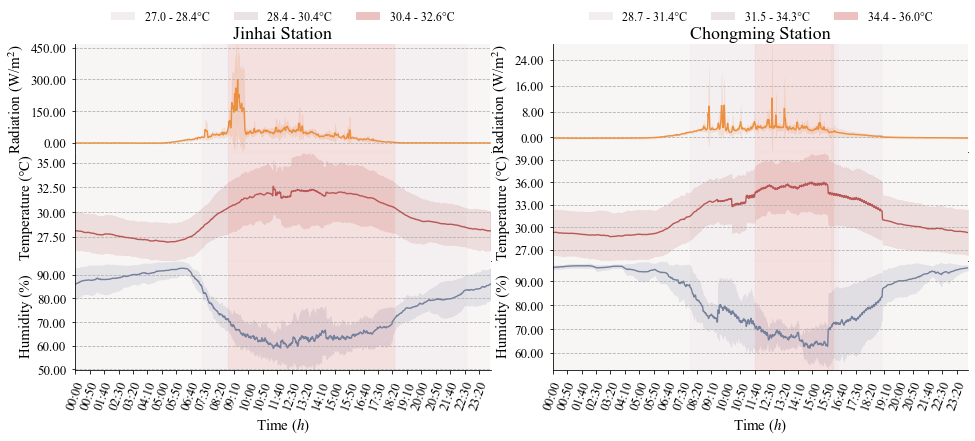

In [80]:
# 更新的变量、颜色、线型和真实名称列表
variables_to_plot1 = ['地面层净辐射', '地面层温度', '地面层湿度']
realnamesunit1 = ['Radiation (W/m$^2$)', 'Temperature (℃)', 'Humidity (%)']
realnames1 = ['GNR', 'Temperature', 'Humidity']


cpal = ["#EC8F3F","#B95756","#75809C"]
cluster_colors = ['#F2EEED', '#EBE2E5', '#EBC2C0']


placedata = [datajh, datacm]
name=["jh","cm"]


fig = plt.figure(figsize=(16, 6))

# 创建一个 GridSpec 布局，根据variables_to_plot的长度
gs = fig.add_gridspec(len(variables_to_plot1), 2, hspace=0, wspace=0.15)

for p, location in enumerate(placedata):
    placedata=location.copy()
    location=location.groupby(["Hour_Min"]).mean().reset_index()

    # 使用KMeans算法进行聚类，聚类数量为3
    kmeans = KMeans(n_clusters=3, random_state=132,max_iter=3000).fit(location[['地面层温度']])

    # 获得每个聚类中心的温度
    centroids = kmeans.cluster_centers_.flatten()

    # 根据聚类中心温度对标签进行排序
    sorted_labels = [label for _, label in sorted(zip(centroids, range(3)))]

    # 将排序后的标签映射到原始标签
    remapped_labels = {original: sorted_labels.index(original) for original in range(3)}

    # 更新DataFrame中的标签
    location['cluster'] = [remapped_labels[label] for label in kmeans.labels_]

    # 将聚类结果标记为lower, medium, higher temperature
    temperature_labels = ['lower temperature', 'medium temperature', 'higher temperature']
    location['Tcluster'] = location['cluster'].apply(lambda x: temperature_labels[x])



    if name[p] == "jh":
        locationname = "Jinhai"
    else:
        locationname = "Chongming"


    for var_idx, variable in enumerate(variables_to_plot1):
        # 对于每个变量，选择一个子图
        ax = fig.add_subplot(gs[var_idx, p])
        ax.grid(linestyle="--",axis='y')

        location[variable + '_std']=placedata.groupby(["Hour_Min"]).std().reset_index()[variable]

          # 计算均值和标准偏差
        mean_values = placedata.groupby("Hour_Min")[variable].mean()
        std_values = placedata.groupby("Hour_Min")[variable].std()

        sns.lineplot(x=location.Hour_Min, y=location[variable],
                 ax=ax, color=cpal[var_idx], err_style='band', errorbar='sd')
        ax.fill_between(location.Hour_Min, mean_values - std_values, mean_values + std_values, color=cpal[var_idx], alpha=0.3)


                # 使用 clusterplot 函数绘制背景色
        clusterplot(location,fig, ax)



        # 设置标题和图例
        ax.set_ylabel(realnamesunit1[var_idx], fontsize=15)  # 使用realnames作为y轴标签


        # 设置x-ticks为combined_temp_data的索引
        if var_idx == len(variables_to_plot1) - 1:  # 只在最后一个小子图中显示x轴标签
            interval = 50  # 每隔400个点显示一个时间
            ticks = location.Hour_Min[::interval]
            labels = location.Hour_Min[::interval]
            ax.set_xticks(ticks)
            ax.set_xticklabels(labels, rotation=70)  # rotation可以使标签旋转，提高可读性
            ax.set_xlabel("Time ($h$)",fontsize=15)
        else:
            ax.set_xticks([])

        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlim(0, location.shape[0])
        ax.set_ylim((mean_values - std_values).min(), (mean_values + std_values).max())

        if var_idx == 0:
            ax.set_title(f"{locationname} Station", fontsize=18)

        # 移除每个子图的上和右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        #设置刻度
        ax.tick_params(axis='both', labelsize=13)

        def format_ticks(x, pos):
            return f'{x:.2f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
        # 设置x轴刻度的格式
        ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))


        if var_idx == 0:
            temperature_ranges = {}
            for cluster_label in range(3):  # 对于每个聚类标签
                cluster_temps = location[location['cluster'] == cluster_label]['地面层温度']
                temperature_ranges[temperature_labels[cluster_label]] = (cluster_temps.min(), cluster_temps.max())


             # 为当前地点添加图例
            legend_elements = [Patch(facecolor=cluster_colors[i], edgecolor='none',
                                     label=f'{temp_range[0]:.1f} - {temp_range[1]:.1f}°C')
                               for i, temp_range in enumerate(temperature_ranges.values())]


            # 这里假设你希望图例出现在每个地点的最后一个子图上
            ax.legend(handles=legend_elements, title='', frameon=False, loc="upper center", fontsize=12, ncol=3, bbox_to_anchor=(0.5, 1.4))


plt.tight_layout()
plt.savefig("环境因子 plot.svg", bbox_inches='tight')
plt.show()

C:\Users\aa271\AppData\Local\Temp\ipykernel_3232\1185774698.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datare=datajh.groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


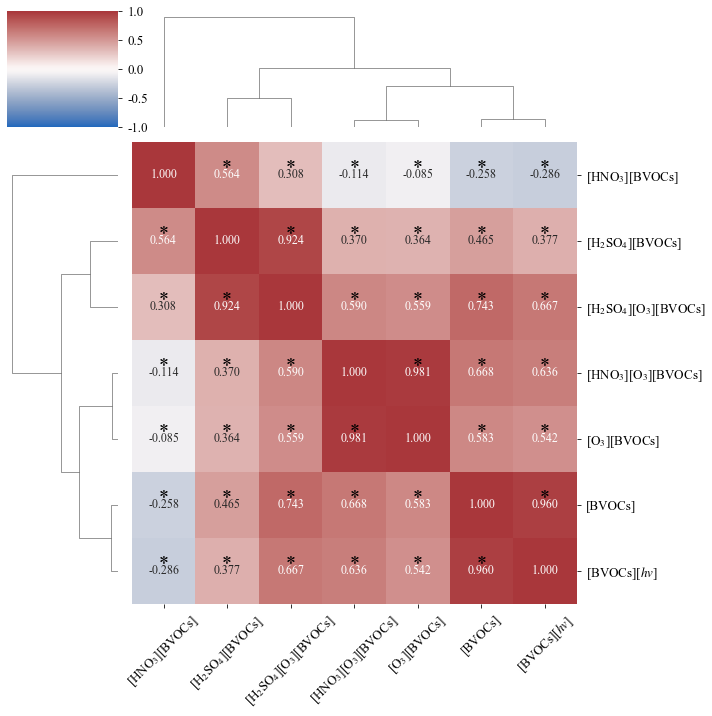

In [15]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import pearsonr,spearmanr


dataj=pd.DataFrame()
datare=datajh.groupby(["Hour_Min"]).mean().reset_index()

dataj["Time"]=datare["Hour_Min"]
# 转换时间数据
dataj['Time'] = pd.to_datetime(dataj['Time'])


dataj["BVOC"]=datare.异戊二烯浓度
dataj["T"]=datare["地面层温度"]
dataj["hv"]=datare["地面层净辐射"]
dataj["RH"]=datare["地面层湿度"]
dataj["O3"]=datare.O3
dataj["NOx"]=datare.NOx
dataj["SO2"]=datare.SO2
dataj["SOA"]=datare["SOA"]
dataj["K"]=1

dataj["HNO3"]=dataj["RH"]*dataj["NOx"]
dataj["H2SO4"]=dataj["RH"]*dataj["SO2"]
dataj["H2SO403"]=dataj["RH"]*dataj["SO2"]*dataj["O3"]
dataj["HNO3O3"]=dataj["RH"]*dataj["NOx"]*dataj["O3"]
dataj["O3"]=dataj["O3"]*dataj["hv"]
dataj["hv"]=dataj["hv"]
# 将这些变量乘以 BVOC
variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3","K","hv"]

datak=pd.DataFrame()
for var in variables_to_regress:
    datak[var + "_BVOC"] = dataj[var] * dataj["BVOC"]

variablename=['[HNO$_3$][BVOCs]',
 '[H$_2$SO$_4$][BVOCs]',
 '[H$_2$SO$_4$][O$_3$][BVOCs]',
 '[HNO$_3$][O$_3$][BVOCs]',
 '[O$_3$][BVOCs]',
 '[BVOCs]',
 '[BVOCs][$hv$]']


def get_correlations(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how="outer")
    correlations = dfcols.transpose().join(dfcols, how="outer")
    for ix, r in enumerate(df.columns):
        for jx, c in enumerate(df.columns):
            sp = pearsonr(df[r], df[c])
            correlations[c][r] = sp[0]
            pvalues[c][r] = sp[1] if ix > jx else np.nan  # Only store values below the diagonal
    return correlations.astype("float"), pvalues.astype("float")


correlations, uncorrected_p_values = get_correlations(datak)
# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Here we start plotting
g = sns.clustermap(correlations, cmap=sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1,square=True,annot=True,fmt=".3f", annot_kws={"size": 12})

# Here labels on the y-axis are rotated
for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

g.ax_heatmap.set_xticklabels(variablename, rotation=45)
g.ax_heatmap.set_yticklabels(variablename, rotation=0)
# 设置颜色条的刻度标签大小
g.cax.tick_params(labelsize=13)


#设置刻度
g.ax_heatmap.tick_params(axis='both', labelsize=13)

# Here we add asterisks onto cells with signficant correlations
for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if i != j:
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.4,
                "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(20)

plt.tight_layout()
plt.savefig("jhvor.svg",bbox_inches='tight')

In [16]:
# 假设 correlations 是你已经计算好的相关性矩阵
correlations, _ = get_correlations(datak)

# 设置相关性阈值
threshold = 0.8

# 找出相关性过强的变量对
cols_to_remove = set()
for i in range(correlations.shape[0]):
    for j in range(i+1, correlations.shape[1]):
        if abs(correlations.iloc[i, j]) > threshold:
            # 选择要移除的变量，例如可以基于某些标准
            # 这里简单地选择保留第一个变量，移除第二个
            cols_to_remove.add(correlations.columns[j])

# 更新数据集，移除相关性过强的变量
datak_updated = datak.drop(columns=cols_to_remove)


# 选择变量进行线性回归
X = datak_updated
Y = dataj["SOA"] # 因变量

# 进行线性回归
model = sm.OLS(Y, X).fit(cov_type='HC3')

# 输出结果
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    SOA   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              3330.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:00:39   Log-Likelihood:                         -420.22
No. Observations:                1440   AIC:                                      848.4
Df Residuals:                    1436   BIC:                                      869.5
Df Model:                           4                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

C:\Users\aa271\AppData\Local\Temp\ipykernel_3232\2207853017.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datare=datacm.groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


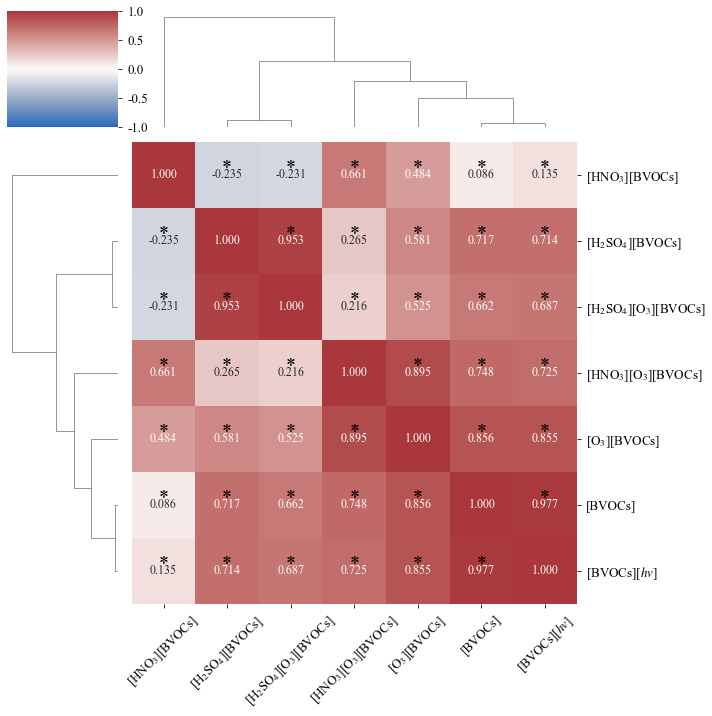

In [17]:
dataj=pd.DataFrame()
datare=datacm.groupby(["Hour_Min"]).mean().reset_index()

dataj["Time"]=datare["Hour_Min"]
# 转换时间数据
dataj['Time'] = pd.to_datetime(dataj['Time'])


dataj["BVOC"]=datare.异戊二烯浓度
dataj["T"]=datare["地面层温度"]
dataj["hv"]=datare["地面层净辐射"]
dataj["RH"]=datare["地面层湿度"]
dataj["O3"]=datare.O3
dataj["NOx"]=datare.NOx
dataj["SO2"]=datare.SO2
dataj["SOA"]=datare["SOA"]
dataj["K"]=1

dataj["HNO3"]=dataj["RH"]*dataj["NOx"]
dataj["H2SO4"]=dataj["RH"]*dataj["SO2"]
dataj["H2SO403"]=dataj["RH"]*dataj["SO2"]*dataj["O3"]
dataj["HNO3O3"]=dataj["RH"]*dataj["NOx"]*dataj["O3"]
dataj["O3"]=dataj["O3"]*dataj["hv"]
dataj["hv"]=dataj["hv"]
# 将这些变量乘以 BVOC
variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3","K","hv"]

datak=pd.DataFrame()
for var in variables_to_regress:
    datak[var + "_BVOC"] = dataj[var] * dataj["BVOC"]

variablename=['[HNO$_3$][BVOCs]',
 '[H$_2$SO$_4$][BVOCs]',
 '[H$_2$SO$_4$][O$_3$][BVOCs]',
 '[HNO$_3$][O$_3$][BVOCs]',
 '[O$_3$][BVOCs]',
 '[BVOCs]',
 '[BVOCs][$hv$]']


def get_correlations(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how="outer")
    correlations = dfcols.transpose().join(dfcols, how="outer")
    for ix, r in enumerate(df.columns):
        for jx, c in enumerate(df.columns):
            sp = pearsonr(df[r], df[c])
            correlations[c][r] = sp[0]
            pvalues[c][r] = sp[1] if ix > jx else np.nan  # Only store values below the diagonal
    return correlations.astype("float"), pvalues.astype("float")


correlations, uncorrected_p_values = get_correlations(datak)
# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Here we start plotting
g = sns.clustermap(correlations, cmap=sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1,square=True,annot=True,fmt=".3f", annot_kws={"size": 12})

# Here labels on the y-axis are rotated
for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

g.ax_heatmap.set_xticklabels(variablename, rotation=45)
g.ax_heatmap.set_yticklabels(variablename, rotation=0)
# 设置颜色条的刻度标签大小
g.cax.tick_params(labelsize=13)


#设置刻度
g.ax_heatmap.tick_params(axis='both', labelsize=13)

# Here we add asterisks onto cells with signficant correlations
for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if i != j:
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.4,
                "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(20)

plt.tight_layout()
plt.savefig("cmvor.svg",bbox_inches='tight')

In [18]:
# 假设 correlations 是你已经计算好的相关性矩阵
correlations, _ = get_correlations(datak)

# 设置相关性阈值
threshold = 0.8

# 找出相关性过强的变量对
cols_to_remove = set()
for i in range(correlations.shape[0]):
    for j in range(i+1, correlations.shape[1]):
        if abs(correlations.iloc[i, j]) > threshold:
            # 选择要移除的变量，例如可以基于某些标准
            # 这里简单地选择保留第一个变量，移除第二个
            cols_to_remove.add(correlations.columns[j])

# 更新数据集，移除相关性过强的变量
datak_updated = datak.drop(columns=cols_to_remove)


# 选择变量进行线性回归
X = datak_updated
Y = dataj["SOA"] # 因变量

# 进行线性回归
model = sm.OLS(Y, X).fit(cov_type='HC3')

# 输出结果
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    SOA   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              5542.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:00:56   Log-Likelihood:                         -215.97
No. Observations:                1440   AIC:                                      439.9
Df Residuals:                    1436   BIC:                                      461.0
Df Model:                           4                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

C:\Users\aa271\AppData\Local\Temp\ipykernel_3232\3352686086.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datare=datacm.groupby(["Hour_Min"]).mean().reset_index()
C:\Users\aa271\AppData\Local\Temp\ipykernel_3232\3352686086.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datare=pd.concat([datare,datajh.groupby(["Hour_Min"]).mean().reset_index()],axis=0)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


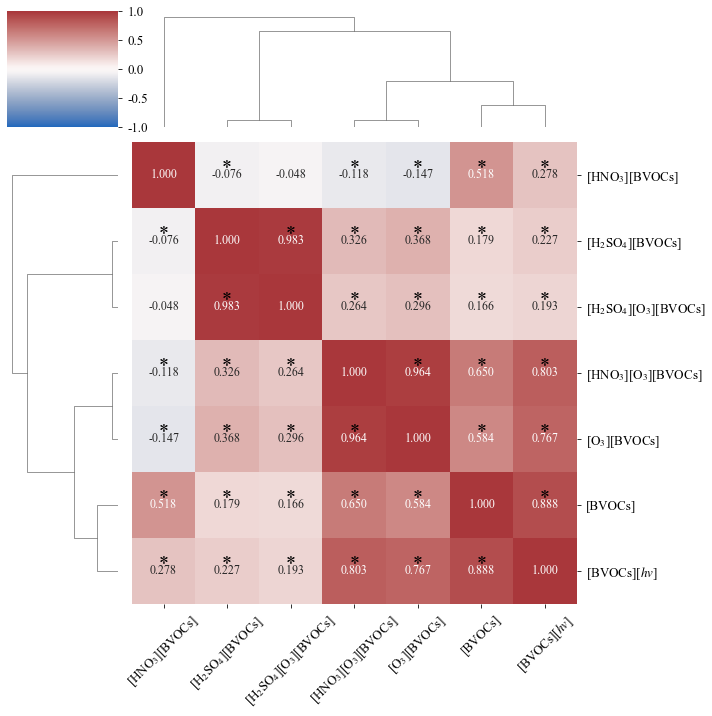

In [19]:
dataj=pd.DataFrame()
datare=datacm.groupby(["Hour_Min"]).mean().reset_index()
datare=pd.concat([datare,datajh.groupby(["Hour_Min"]).mean().reset_index()],axis=0)

dataj["Time"]=datare["Hour"]
# 转换时间数据
dataj['Time'] = pd.to_datetime(dataj['Time'])


dataj["BVOC"]=datare.异戊二烯浓度
dataj["T"]=datare["地面层温度"]
dataj["hv"]=datare["地面层净辐射"]
dataj["RH"]=datare["地面层湿度"]
dataj["O3"]=datare.O3
dataj["NOx"]=datare.NOx
dataj["SO2"]=datare.SO2
dataj["SOA"]=datare["SOA"]
dataj["K"]=1

dataj["HNO3"]=dataj["RH"]*dataj["NOx"]
dataj["H2SO4"]=dataj["RH"]*dataj["SO2"]
dataj["H2SO403"]=dataj["RH"]*dataj["SO2"]*dataj["O3"]
dataj["HNO3O3"]=dataj["RH"]*dataj["NOx"]*dataj["O3"]
dataj["O3"]=dataj["O3"]*dataj["hv"]
dataj["hv"]=dataj["hv"]
# 将这些变量乘以 BVOC
variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3","K","hv"]

datak=pd.DataFrame()
for var in variables_to_regress:
    datak[var + "_BVOC"] = dataj[var] * dataj["BVOC"]

variablename=['[HNO$_3$][BVOCs]',
 '[H$_2$SO$_4$][BVOCs]',
 '[H$_2$SO$_4$][O$_3$][BVOCs]',
 '[HNO$_3$][O$_3$][BVOCs]',
 '[O$_3$][BVOCs]',
 '[BVOCs]',
 '[BVOCs][$hv$]']


def get_correlations(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how="outer")
    correlations = dfcols.transpose().join(dfcols, how="outer")
    for ix, r in enumerate(df.columns):
        for jx, c in enumerate(df.columns):
            sp = pearsonr(df[r], df[c])
            correlations[c][r] = sp[0]
            pvalues[c][r] = sp[1] if ix > jx else np.nan  # Only store values below the diagonal
    return correlations.astype("float"), pvalues.astype("float")


correlations, uncorrected_p_values = get_correlations(datak)
# Correct p-values for multiple testing and check significance (True if the corrected p-value < 0.05)
shape = uncorrected_p_values.values.shape
significant_matrix = multipletests(uncorrected_p_values.values.flatten())[0].reshape(
    shape
)

# Here we start plotting
g = sns.clustermap(correlations, cmap=sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1,square=True,annot=True,fmt=".3f", annot_kws={"size": 12})

# Here labels on the y-axis are rotated
for tick in g.ax_heatmap.get_yticklabels():
    tick.set_rotation(0)

g.ax_heatmap.set_xticklabels(variablename, rotation=45)
g.ax_heatmap.set_yticklabels(variablename, rotation=0)
# 设置颜色条的刻度标签大小
g.cax.tick_params(labelsize=13)


#设置刻度
g.ax_heatmap.tick_params(axis='both', labelsize=13)

# Here we add asterisks onto cells with signficant correlations
for i, ix in enumerate(g.dendrogram_row.reordered_ind):
    for j, jx in enumerate(g.dendrogram_row.reordered_ind):
        if i != j:
            text = g.ax_heatmap.text(
                j + 0.5,
                i + 0.4,
                "*" if significant_matrix[ix, jx] or significant_matrix[jx, ix] else "",
                ha="center",
                va="center",
                color="black",
            )
            text.set_fontsize(20)

plt.tight_layout()
plt.savefig("vor.svg",bbox_inches='tight')

In [20]:
# 假设 correlations 是你已经计算好的相关性矩阵
correlations, _ = get_correlations(datak)

# 设置相关性阈值
threshold = 0.8

# 找出相关性过强的变量对
cols_to_remove = set()
for i in range(correlations.shape[0]):
    for j in range(i+1, correlations.shape[1]):
        if abs(correlations.iloc[i, j]) > threshold:
            # 选择要移除的变量，例如可以基于某些标准
            # 这里简单地选择保留第一个变量，移除第二个
            cols_to_remove.add(correlations.columns[j])

# 更新数据集，移除相关性过强的变量
datak_updated = datak.drop(columns=cols_to_remove)


# 选择变量进行线性回归
X = datak_updated
Y = dataj["SOA"] # 因变量

# 进行线性回归
model = sm.OLS(Y, X).fit(cov_type='HC3')

# 输出结果
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    SOA   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              5376.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:01:35   Log-Likelihood:                         -1075.8
No. Observations:                2880   AIC:                                      2160.
Df Residuals:                    2876   BIC:                                      2183.
Df Model:                           4                                                  
Covariance Type:                  HC3                                                  
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------